In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time 

In [4]:
# function that generates a matrix of uniformly distributed random numbers between -1 and 1
def generate_matrix(n):
    return np.random.uniform(-1, 1, (n, n))

# convert a given matrix to a diagonally dominant matrix
def make_diagonally_dominant(matrix):
    n = len(matrix)
    for i in range(n):
        matrix[i][i] = sum(abs(matrix[i]))
    return matrix

In [24]:
def gradient_descent(A, b, x0, tol, max_iter):
    x = x0
    r = b - np.dot(A, x0)
    i = 0
    while i < max_iter:
        if np.linalg.norm(r) < tol:
            return x
        alpha = np.dot(r, r)/np.dot(A@r, r)
        x = x + alpha * r
        r = b - A@x
        i += 1
    return x

def conjugate_gradient(A, b, x0, tol, max_iter):
    x = x0
    r = b - np.dot(A, x0)
    p = r
    c = np.dot(r, r)
    i = 0
    while i < max_iter:
        if np.linalg.norm(r) < tol:
            return x
        z = A@p
        alpha = c/np.dot(p, z)
        x = x + alpha * p
        r = r - alpha * z
        d = np.dot(r, r)
        beta = d/c
        p = r + beta * p
        c = d
        i += 1
    return x

def diagonally_preconditioned_conjugate_gradient(A, b, x0, tol, max_iter):
    x = x0
    r = b - A@x0
    M = np.diag(A)
    z = np.reciprocal(M)*r
    p = z
    c = np.dot(r, z)
    i = 0
    while i < max_iter:
        if np.linalg.norm(r) < tol:
            return x
        z = A@p
        alpha = c/np.dot(p, z)
        x = x + alpha * p
        r = r - alpha * z
        z = np.reciprocal(M)*r
        d = np.dot(r, z)
        beta = d/c
        p = z + beta * p
        c = d
        i += 1
    return x

def DLU(A):
    D = np.diag(np.diag(A))
    L = (np.tril(A) - D)*(-1)
    U = (np.triu(A) - D)*(-1)
    return D,L,U

def SOR_preconditioned_conjugate_gradient(A, b, x0, tol, max_iter):
    x = x0
    r = b - A@x
    D,L,U = DLU(A)
    M = (D+L) @ (np.diag(np.reciprocal(np.diag(D)))) @ (D+L).T
    z = np.linalg.solve(M, r)
    p = z
    c = np.dot(r, z)
    i = 0
    while i < max_iter:
        if np.linalg.norm(r) < tol:
            return x
        z = A@p
        alpha = c/np.dot(p, z)
        x = x + alpha * p
        r = r - alpha * z
        z = np.linalg.solve(M, r)
        d = np.dot(r, z)
        beta = d/c
        p = z + beta * p
        c = d
        i += 1
    return x



In [27]:
sizes = [2**k for k in range(2, 15)]
times_descent = []
times_cg_gradient = []
times_diag_cg = []
times_SOR_cg = []

for size in sizes:
    A = make_diagonally_dominant(generate_matrix(size))
    b = np.ones(size)@A.T
    A = A@A.T
    x0 = np.zeros(size)
    tol = 1e-6
    max_iter =  np.inf

    start = time.time()
    x = gradient_descent(A, b, x0, tol, max_iter)
    end = time.time()
    times_descent.append(end-start)
    start = time.time() 
    x = conjugate_gradient(A, b, x0, tol, max_iter)
    end = time.time()
    times_cg_gradient.append(end-start)
    start = time.time()
    x = diagonally_preconditioned_conjugate_gradient(A, b, x0, tol, max_iter)
    end = time.time()
    times_diag_cg.append(end-start)
    start = time.time()
    x = SOR_preconditioned_conjugate_gradient(A, b, x0, tol, max_iter)
    end = time.time()
    times_SOR_cg.append(end-start)
    print(f'{size} done')

4 done
8 done
16 done
32 done
64 done
128 done
256 done
512 done
1024 done
2048 done
4096 done
8192 done
16384 done


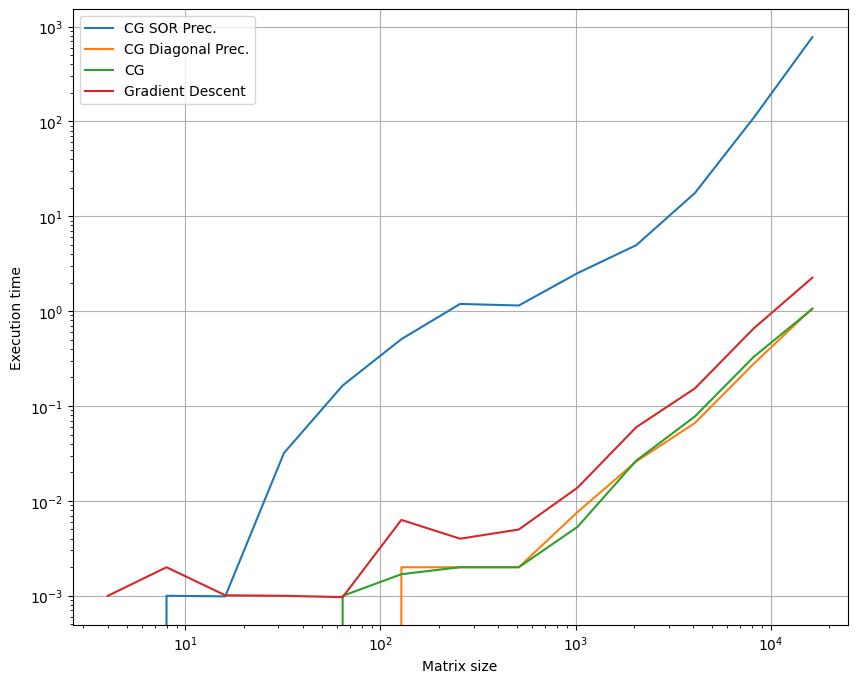

In [28]:
n = len(times_SOR_cg)
plt.figure(figsize=(10, 8))
plt.loglog(sizes[:n], times_SOR_cg[:n], label='CG SOR Prec.')
plt.loglog(sizes[:n], times_diag_cg[:n], label='CG Diagonal Prec.')
plt.loglog(sizes[:n], times_cg_gradient[:n], label='CG')
plt.loglog(sizes[:n], times_descent[:n], label='Gradient Descent')
plt.xlabel('Matrix size')
plt.ylabel('Execution time')
plt.legend()
plt.grid(True)
plt.show()